In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Load the data from a csv file, and the name of the file is diabetes.csv
data = pd.read_csv('diabetes.csv')




In [4]:
# Mathematical operations on the dataset, like generating the birth year from Age
data['Birth Year'] = 2022 - data['Age']

In [5]:
# Show the new column
data.head()
#print(data)

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0       1354778            0            171                      80   
1       1147438            8             92                      93   
2       1640031            7            115                      47   
3       1883350            9            103                      78   
4       1424119            1             85                      59   
...         ...          ...            ...                     ...   
9995    1469198            6             95                      85   
9996    1432736            0             55                      51   
9997    1410962            5             99                      59   
9998    1958653            0            145                      67   
9999    1332938           10            100                      54   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                   34            23  43.509726          1.213191   21   

In [6]:
# convert the BMI column to two decimal values
data['BMI'] = data['BMI'].round(2)
# Show the new column only
data['BMI'].head()
#print(data['BMI'])

0    43.51
1    21.24
2    41.51
3    29.58
4    42.60
Name: BMI, dtype: float64

In [7]:
# Perform count, min, max, std, mean, 25%, 50%, and 75% on the dataset
summary_stats = data.describe()
summary_stats = summary_stats.loc[['count', 'min', 'max', 'std', 'mean', '25%', '50%', '75%']]
print(summary_stats)

          PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.000000e+04  10000.00000   10000.000000            10000.000000   
min    1.000038e+06      0.00000      44.000000               24.000000   
max    1.999997e+06     14.00000     192.000000              117.000000   
std    2.892868e+05      3.40572      31.920909               16.801478   
mean   1.502122e+06      3.25580     107.850200               71.207500   
25%    1.251672e+06      0.00000      84.000000               58.000000   
50%    1.504394e+06      2.00000     105.000000               72.000000   
75%    1.754608e+06      6.00000     129.000000               85.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count       10000.00000  10000.000000  10000.000000      10000.000000   
min             7.00000     14.000000     18.200000          0.078044   
max            92.00000    796.000000     56.030000          2.301594   
std            14.50648    133.7

In [10]:
# Split the data into training and testing data and the column name Diabetic is the target column
x = data.drop('Diabetic', axis=1) 
y = data['Diabetic']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


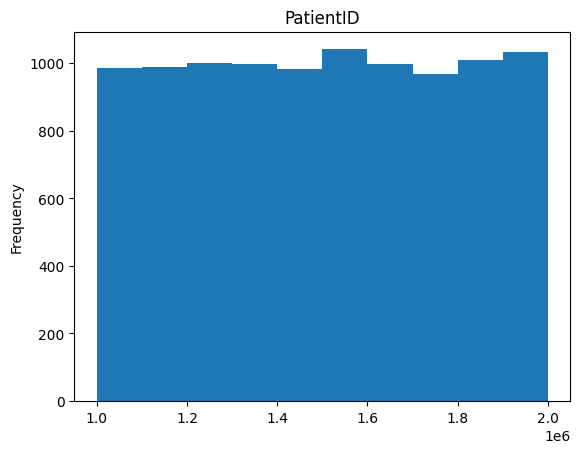

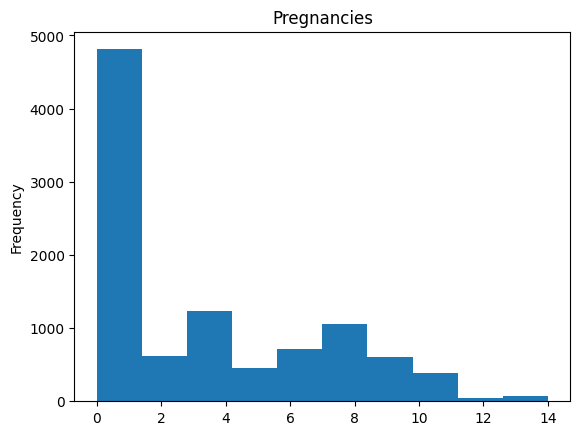

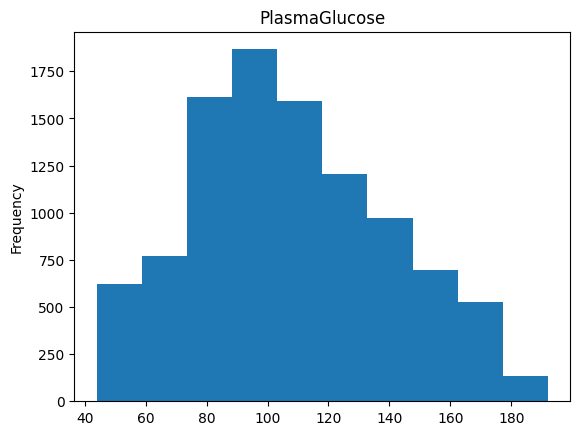

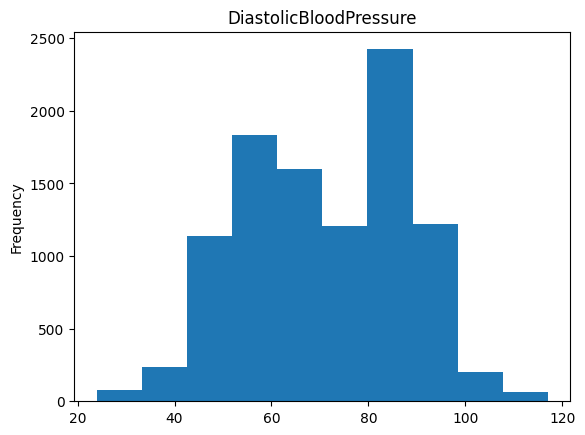

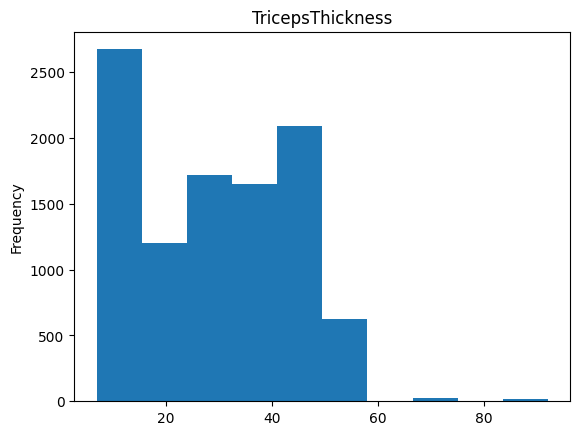

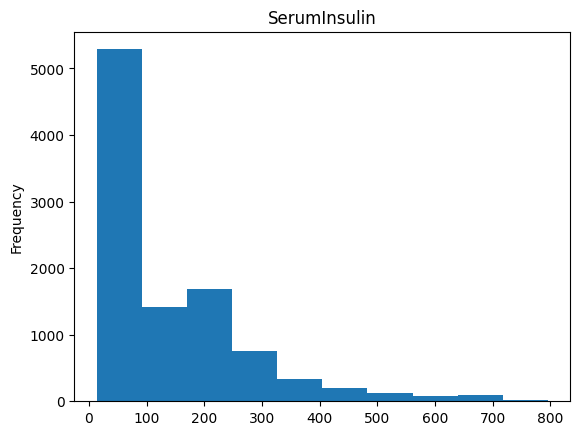

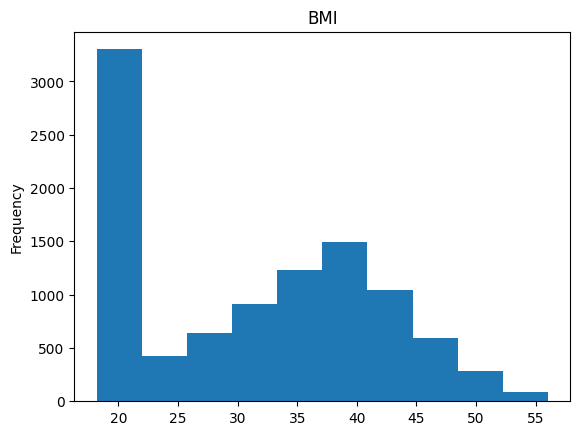

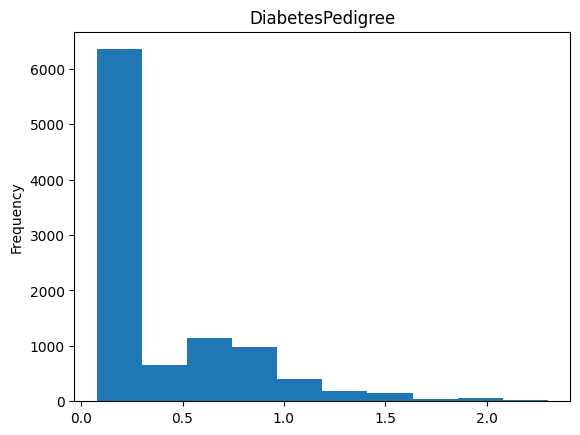

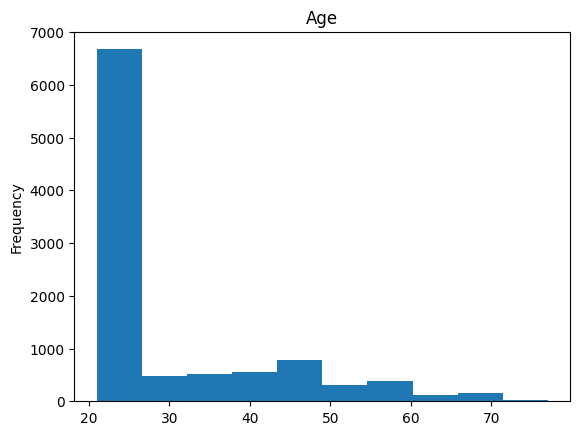

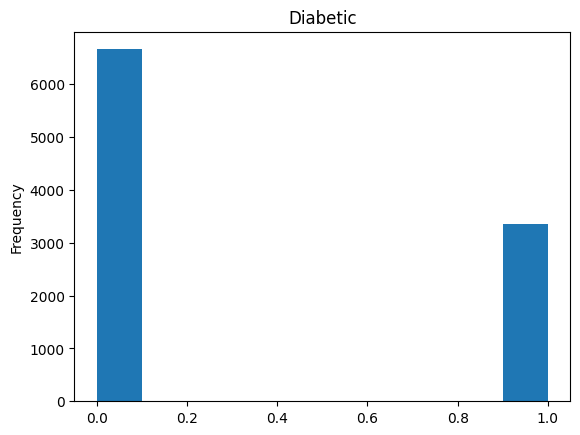

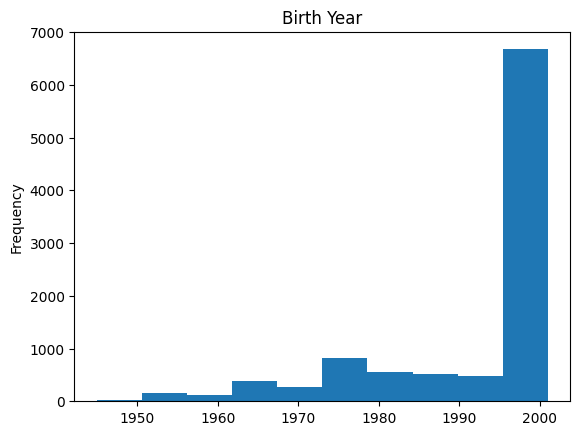

In [11]:
# Perform univariate analysis on the dataset and plot the graphs
import matplotlib.pyplot as plt

# Perform univariate analysis on the dataset and plot the graphs
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure()
        data[column].plot(kind='hist', title=column)
        plt.show()

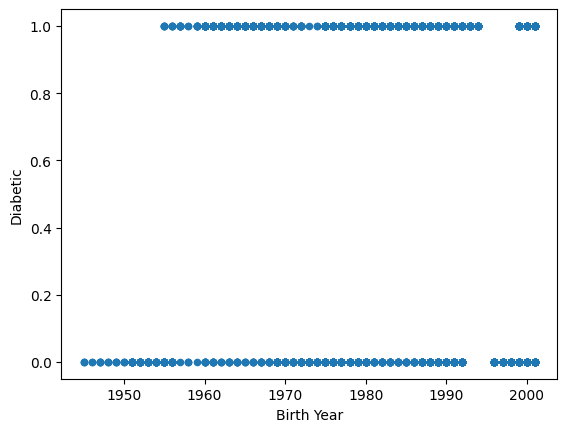

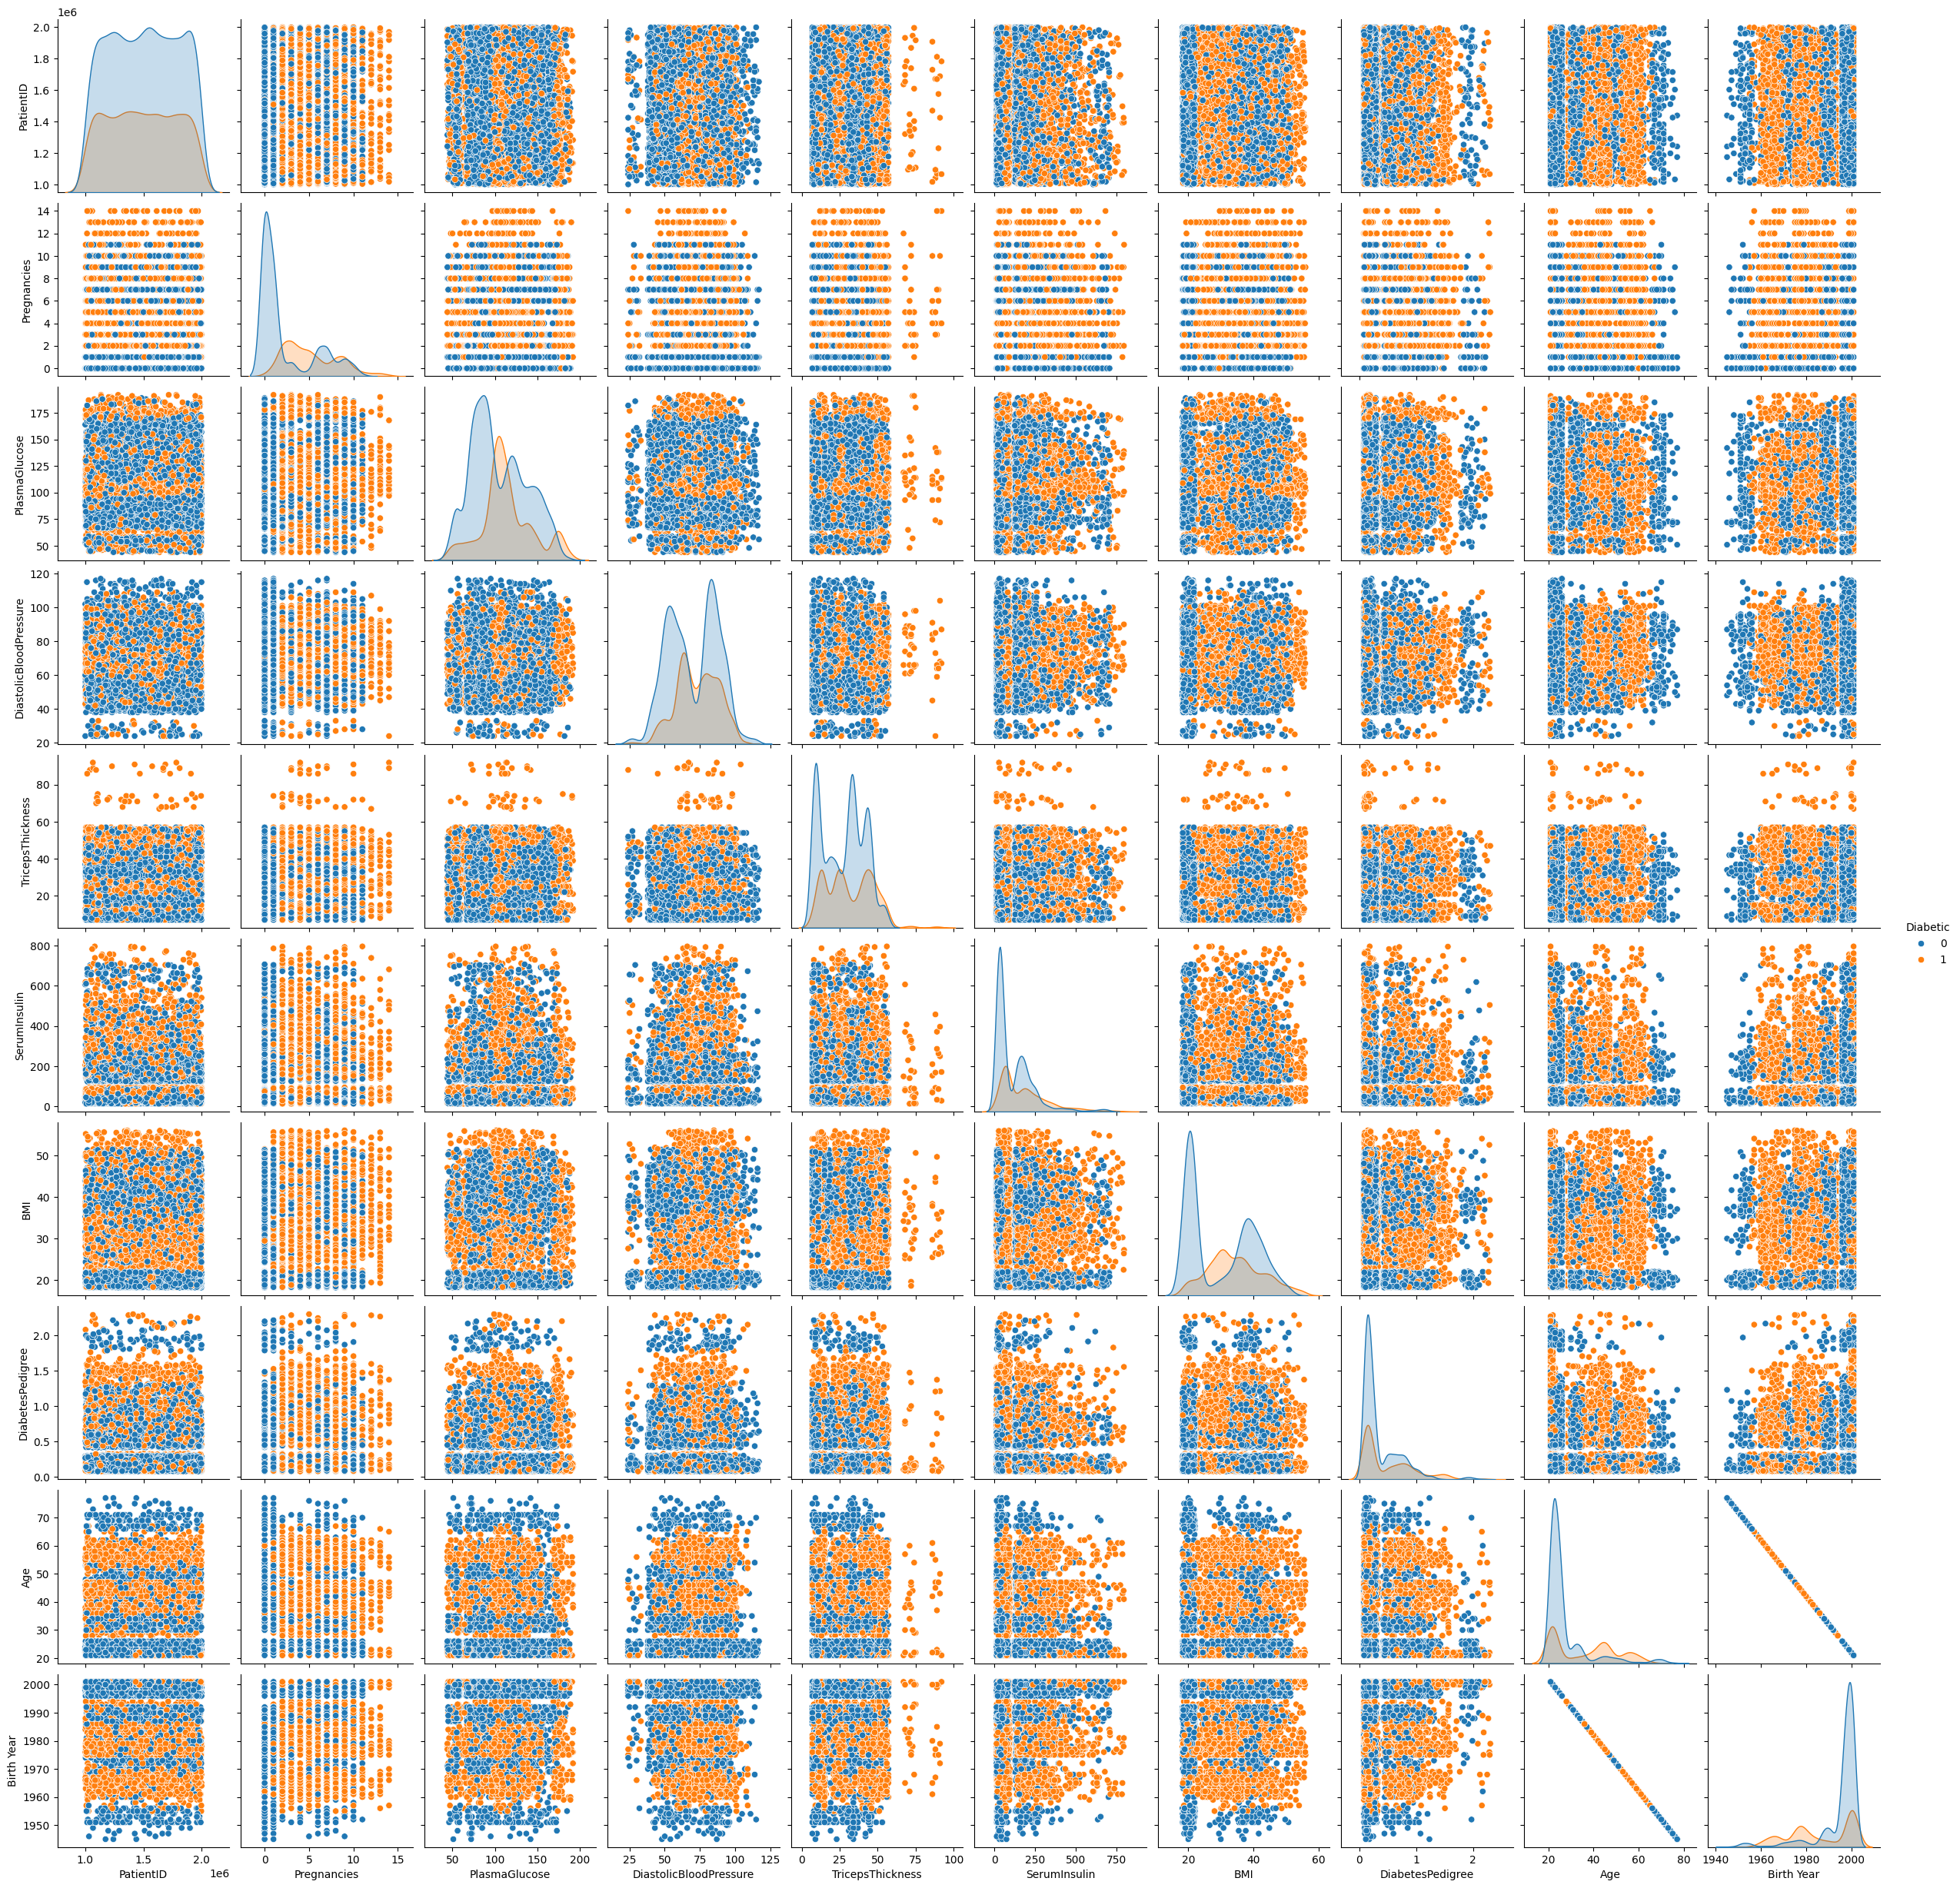

In [13]:
import seaborn as sns
# Perform scatter plot on the dataset and plot the graphs
data.plot.scatter(x='Birth Year', y='Diabetic')
sns.pairplot(data, hue='Diabetic')
plt.show()

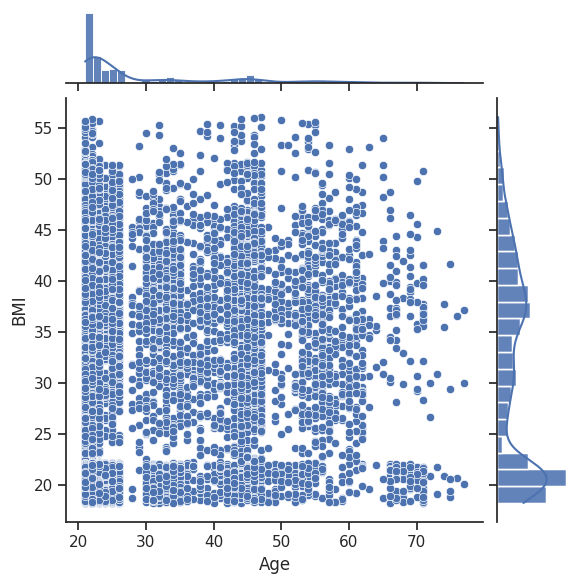

In [20]:
import seaborn as sns

# Perform Joint Grid plot on the dataset and plot the graphs
g = sns.jointplot(data=data, x='Age', y='BMI', kind='scatter')
g.plot_marginals(sns.histplot, kde=True)
plt.show()

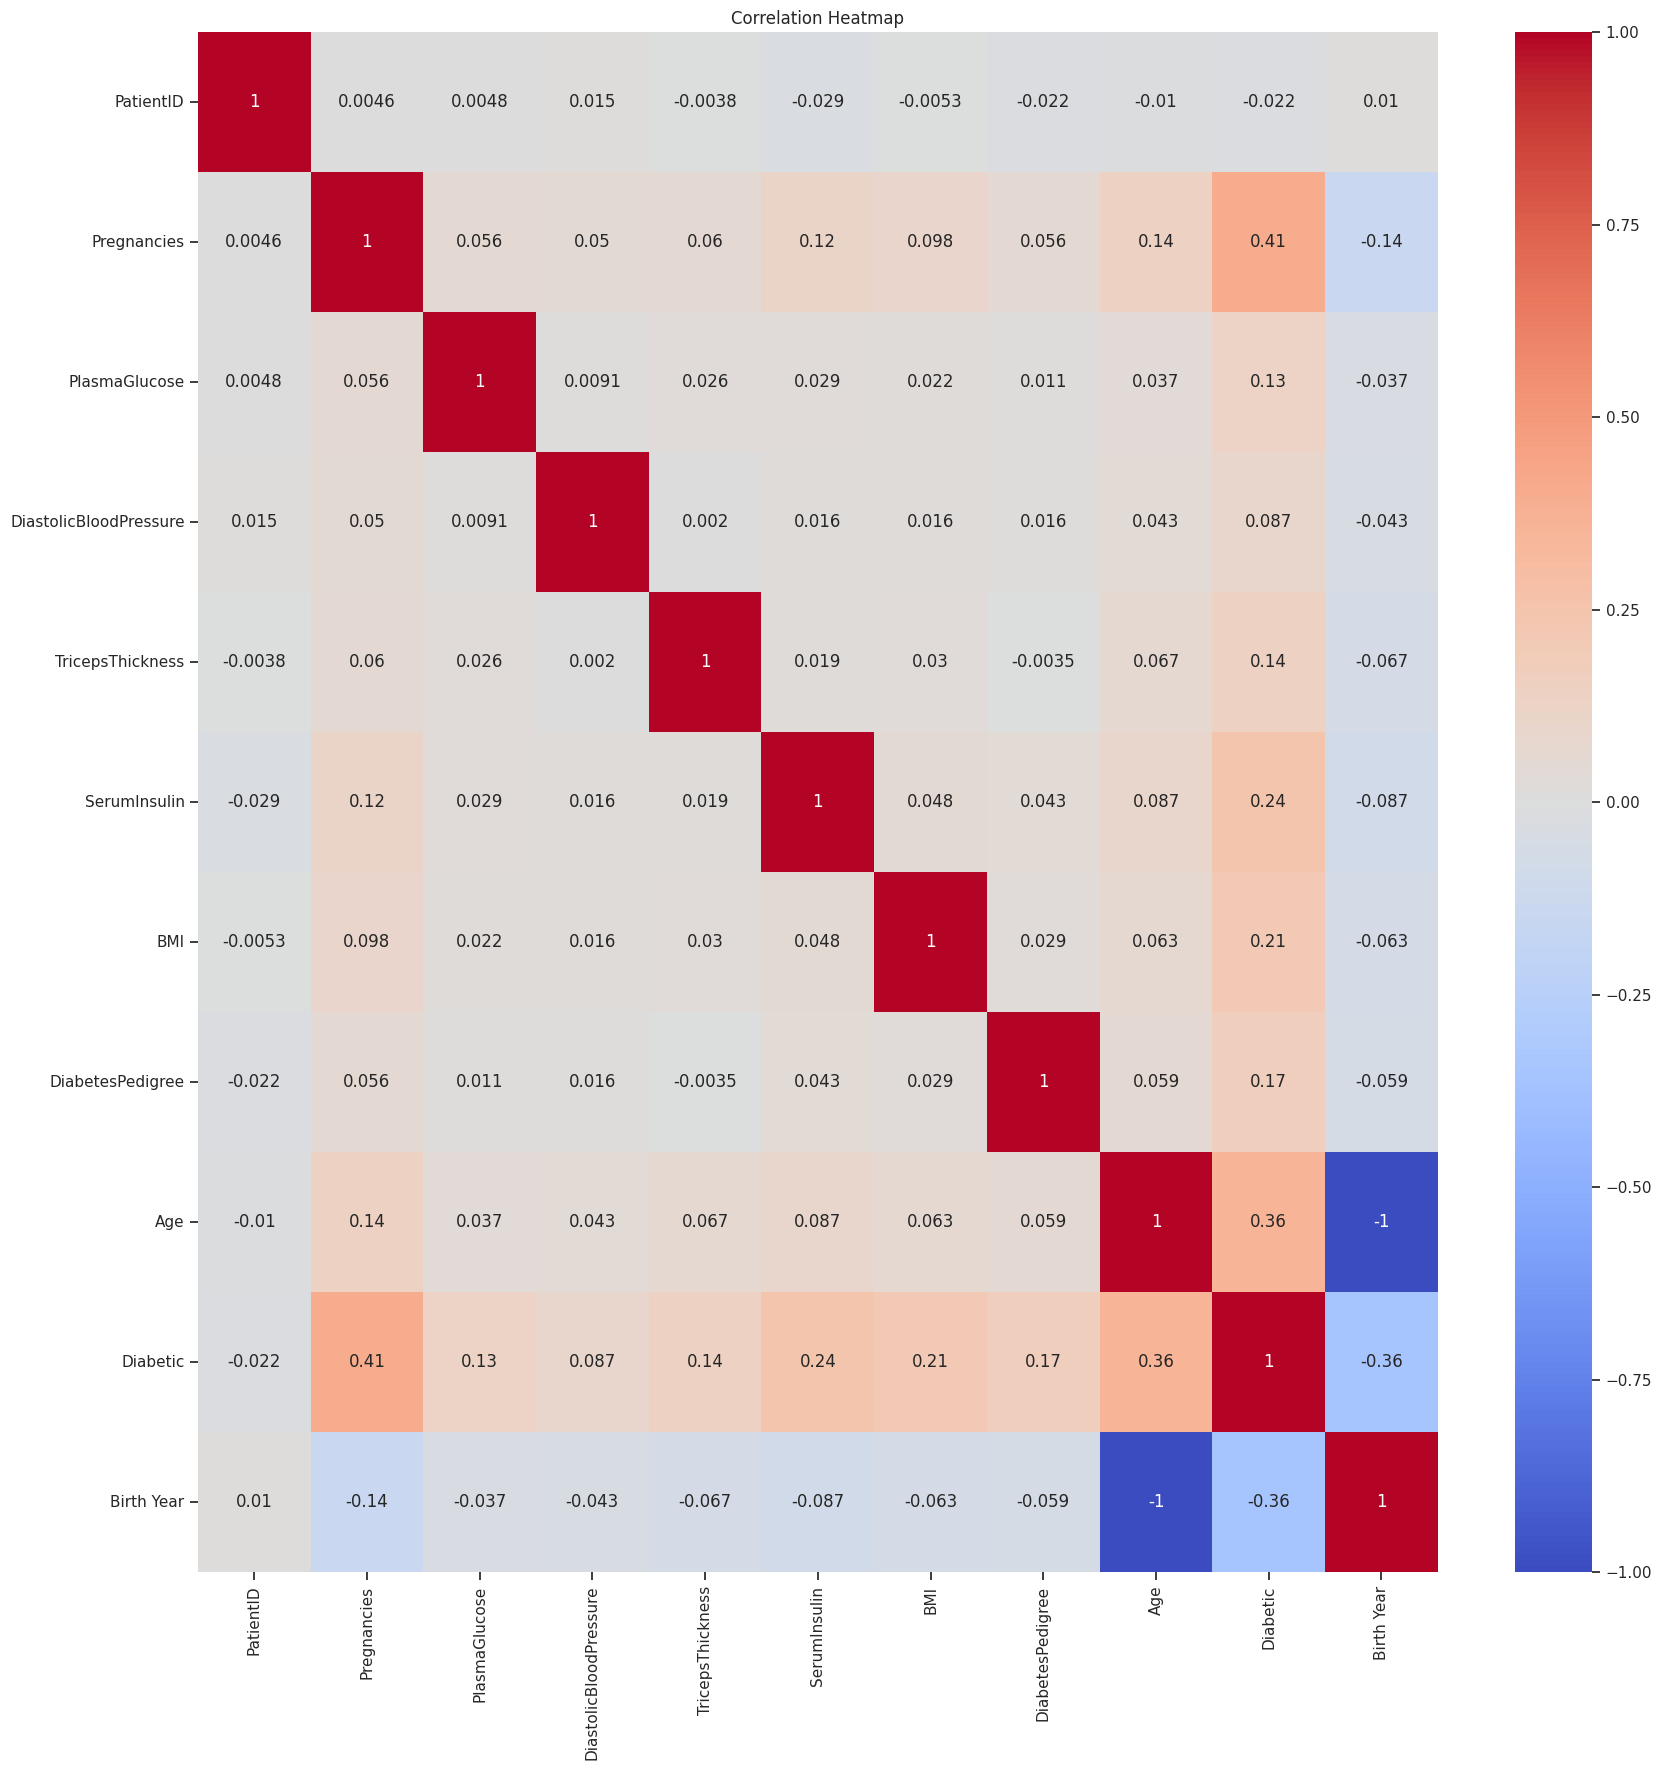

In [21]:
# Perform comparison on all features of the dataset and plot the graphs in a single plot using heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Perform standardization on the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data)

data_feat = pd.DataFrame(scaled_data, columns=data.columns)
data_feat.head()


PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0  -0.509361    -0.956028       1.978420                0.523343   
1  -1.226125     1.393079      -0.496571                1.297123   
2   0.476744     1.099441       0.223996               -1.440868   
3   1.317886     1.686718      -0.151952                0.404300   
4  -0.269653    -0.662389      -0.715874               -0.726609   

   TricepsThickness  SerumInsulin       BMI  DiabetesPedigree       Age  \
0          0.357265     -0.868973  1.218184          2.129402 -0.754545   
1          1.253461     -0.771792 -1.053364         -0.635948 -0.589330   
2          1.598152     -0.779268  1.014184         -0.843964 -0.589330   
3         -0.263178      1.231628 -0.202681          2.312072  1.062820   
4         -0.125302     -0.779268  1.125364          0.389567 -0.671937   

   Diabetic  Birth Year  
0 -0.708805    0.754545  
1 -0.708805    0.589330  
2 -0.708805    0.589330  
3  1.410826   -1.062820  
4 -0.708805    0.671937

In [24]:
# Create a random forest model with 100 trees, and the criterion is entropy
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(x_train, y_train)



RandomForestClassifier(criterion='entropy')

In [25]:
# Calculate the accuracy of the model
accuracy = model.score(x_test, y_test) 
print("Accuracy:", accuracy)

Accuracy: 0.929
